In [1]:
!pip install pdfplumber

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 72.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 83.0 MB/s eta 0:00:00


In [6]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')   # <-- NEW requirement
nltk.download('wordnet')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
!pip install reportlab

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 25.2 MB/s eta 0:00:00


In [7]:
import re
import pdfplumber
from reportlab.pdfgen import canvas
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')  # Download the punkt tokenizer if you haven't already
nltk.download('wordnet')
def extract_text_from_pdf(pdf_path):
    with pdfplumber.open('/content/Dataset for ChatBot.pdf') as pdf:
        text = ''
        for page in pdf.pages:
            text += page.extract_text() + ' '
    return text

def preprocess_text(text):
    lemmatizer = WordNetLemmatizer()

    # Tokenization
    sentences = nltk.sent_tokenize(text)
    tokens = [nltk.word_tokenize(sent) for sent in sentences]

    # Numerical normalization, Lowercasing, Removing punctuation, Removing extra spaces, Lemmatization
    preprocessed_tokens = []
    for sent_tokens in tokens:
        processed_tokens = [lemmatizer.lemmatize(token.lower()) if not token.isdigit() else '<number>' for token in sent_tokens if token.isalnum()]
        preprocessed_tokens.append(processed_tokens)

    return preprocessed_tokens

def save_text_to_pdf(preprocessed_tokens, output_pdf_path):
    c = canvas.Canvas(output_pdf_path)
    y = 800
    for sentence_tokens in preprocessed_tokens:
        x = 72
        for token in sentence_tokens:
            c.drawString(x, y, token)  # Adjust position as needed
            x += 10  # Move to the next token (adjust this as per your requirements)
        y -= 20  # Move to the next line
    c.save()

# Example usage
input_pdf_path = '/content/An Effective E-Commerce System for Bangladesh to Adopt – An Empirical Study (2).pdf'  # Change to your PDF file path
output_pdf_path = '/content/preprocessed_Dataset.pdf'  # Output file path

text = extract_text_from_pdf(input_pdf_path)
preprocessed_tokens = preprocess_text(text)
save_text_to_pdf(preprocessed_tokens, output_pdf_path)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
import re
import pdfplumber
from reportlab.pdfgen import canvas
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')  # Download the punkt tokenizer if you haven't already
nltk.download('wordnet')

def extract_text_from_pdf(pdf_path):
    with pdfplumber.open(pdf_path) as pdf:
        text = ''
        for page in pdf.pages:
            text += page.extract_text() + ' '
    return text

def preprocess_text(text):
    lemmatizer = WordNetLemmatizer()

    # Tokenization
    sentences = nltk.sent_tokenize(text)
    tokens = [nltk.word_tokenize(sent) for sent in sentences]

    # Lowercasing, Removing punctuation, Removing extra spaces, Lemmatization
    preprocessed_tokens = []
    for sent_tokens in tokens:
        processed_tokens = [lemmatizer.lemmatize(token.lower()) for token in sent_tokens if token.isalnum()]
        preprocessed_tokens.append(processed_tokens)

    return preprocessed_tokens

def save_text_to_pdf(preprocessed_tokens, output_pdf_path):
    c = canvas.Canvas(output_pdf_path)
    y = 800
    for sentence_tokens in preprocessed_tokens:
        x = 72
        for token in sentence_tokens:
            c.drawString(x, y, token)  # Adjust position as needed
            x += 10  # Move to the next token (adjust this as per your requirements)
        y -= 20  # Move to the next line
    c.save()

# Example usage
input_pdf_path = '/content/Dataset for ChatBot.pdf'  # Change to your PDF file path
output_pdf_path = '/content/preprocessed_Dataset.pdf'  # Output file path

text = extract_text_from_pdf(input_pdf_path)
preprocessed_tokens = preprocess_text(text)
save_text_to_pdf(preprocessed_tokens, output_pdf_path)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Cosine Similarity and Semantic Similarity Score Analysis

In [13]:
import csv

file_path = '/content/Analysis.csv'

with open(file_path, newline='', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)
    # Access the field names (headers)
    headers = reader.fieldnames
    print(headers)

FileNotFoundError: [Errno 2] No such file or directory: '/content/Analysis.csv'

In [ ]:
import csv
import numpy as np
import tensorflow_hub as hub

# Load Universal Sentence Encoder
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

file_path = '/content/Analysis.csv'
responses = []
expected = []

# Read data from CSV
with open(file_path, newline='', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        responses.append(row['response'])
        expected.append(row['expected'])

# Calculate cosine similarity
vectorizer = CountVectorizer().fit_transform(responses + expected)
response_vectors = vectorizer[:len(responses)]
expected_vectors = vectorizer[len(responses):]
cosine_similarities = cosine_similarity(response_vectors, expected_vectors)

# Calculate semantic similarity using Universal Sentence Encoder
response_embeddings = embed(responses)
expected_embeddings = embed(expected)
semantic_similarities = np.inner(response_embeddings, expected_embeddings)

# Calculate average similarity scores
average_cosine_similarity = np.mean(cosine_similarities.diagonal())
average_semantic_similarity = np.mean(semantic_similarities.diagonal())

print(f"Average Cosine Similarity: {average_cosine_similarity}")
print(f"Average Semantic Similarity: {average_semantic_similarity}")


Average Cosine Similarity: 0.8080950993394342
Average Semantic Similarity: 0.8521837592124939


In [ ]:
print(cosine_similarities.diagonal())

[0.34914862 0.30308003 0.54723417 0.32271372 0.55910614 0.68895102
 0.32260254 0.47140452 0.27958071 1.         1.         1.
 1.         0.9375     0.9078413  1.         1.         1.
 1.         1.         1.         0.9375     1.         1.
 1.         1.         1.         1.        ]


In [ ]:
print(semantic_similarities.diagonal())

[0.549142   0.40274847 0.73123926 0.6147414  0.6739478  0.6408143
 0.38950965 0.50731254 0.58047885 0.99999976 0.99999964 0.99999964
 1.0000001  0.94611144 0.9138259  0.9999999  0.99999976 1.
 0.9651646  0.99999964 1.0000001  0.9461114  0.99999976 0.99999964
 1.0000002  1.0000002  0.9999999  1.0000002 ]


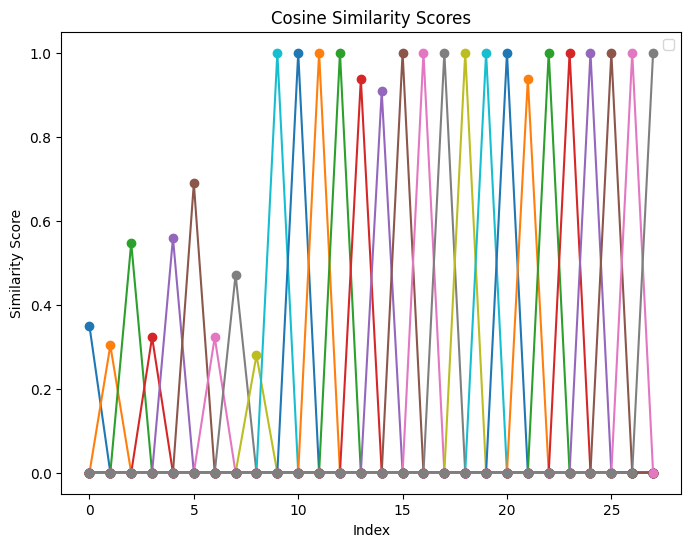

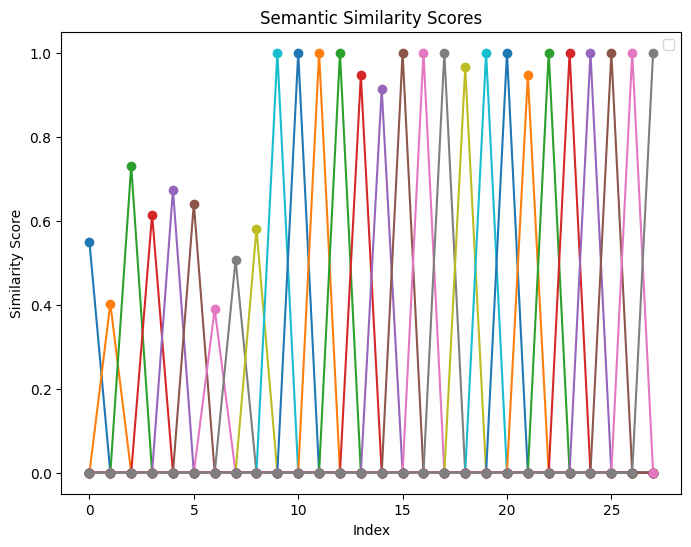

In [ ]:
import matplotlib.pyplot as plt

# Assuming cosine_similarities and semantic_similarities are computed arrays

# Plotting cosine similarities
plt.figure(figsize=(8, 6))
plt.plot(np.diag(cosine_similarities.diagonal()), marker='o')
plt.xlabel('Index')
plt.ylabel('Similarity Score')
plt.title('Cosine Similarity Scores')
plt.legend()
plt.show()

# Plotting semantic similarities
plt.figure(figsize=(8, 6))
plt.plot(np.diag(semantic_similarities.diagonal()), marker='o')
plt.xlabel('Index')
plt.ylabel('Similarity Score')
plt.title('Semantic Similarity Scores')
plt.legend()
plt.show()